In [62]:
# 대중교통 데이터 읽어오기
import csv
f=open('subwayfee.csv',encoding='euc_kr')

data=csv.reader(f)
header=next(data)
print(header)
i=0
for row in data:
    print(row)
    if i>5:
        break
    i+=1
f.close()

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차', '']
['Jun-22', '1호선', '150', '서울역', '1150754', '1123193', '194717', '187155', '']
['Jun-22', '1호선', '151', '시청', '537067', '543569', '80671', '78279', '']
['Jun-22', '1호선', '152', '종각', '834173', '815704', '131987', '121717', '']
['Jun-22', '1호선', '153', '종로3가', '450317', '404106', '299617', '278151', '']
['Jun-22', '1호선', '154', '종로5가', '394420', '404105', '254236', '244555', '']
['Jun-22', '1호선', '155', '동대문', '212719', '198987', '117499', '118515', '']
['Jun-22', '1호선', '156', '신설동', '264825', '252339', '112362', '106855', '']


### 유임 승차 대 무임 승차 비율이 가장 높은 역은?
- 유임 승차 대 무임 승차 비율 (rate) 계산
    - rate = ${유임승차인원 \over 무임승차인원}$

In [63]:
import csv
f=open('subwayfee.csv')
data=csv.reader(f)
next(data)
max_rate=0
rate=0

for row in data:
    for i in range(4,8):
        row[i]=int(row[i])  # 4, 5, 6, 7 컬럼값을 정수로 변환
    rate = row[4] / row[6]
    if rate > max_rate:
        max_rate = rate
print(max_rate)

ZeroDivisionError: division by zero

In [64]:
import csv
f=open('subwayfee.csv')
data=csv.reader(f)
next(data)
max_rate=0
rate=0

for row in data:
    for i in range(4,8):
        row[i]=int(row[i])  # 4, 5, 6, 7 컬럼값을 정수로 변환
    rate = row[4] / row[6]
    if rate > max_rate:
        max_rate = rate
print(max_rate)

ZeroDivisionError: division by zero

In [65]:
# 무임승차 인원이 0인 역 찾기
import csv
f=open('subwayfee.csv')
data=csv.reader(f)
next(data)
max_rate=0
rate=0
i=0
for row in data:
    for i in range(4,8):
        row[i]=int(row[i])  # 4, 5, 6, 7 컬럼값을 정수로 변환
    rate=row[4]/(row[4]+row[6])
    
    if row[6] ==0:  # 무임승차 인원[6]이 없는 역 출력
        print(row)
        
f.close()

['Jun-22', '일산선', '1949', '지축', 10, 0, 0, 0, '']
['Jun-22', '경의선', '1296', '계양', 10, 0, 0, 0, '']
['Jun-22', '경의선', '1297', '검암', 2, 0, 0, 0, '']
['Jun-22', '6호선', '2615', '연신내', 31, 0, 0, 0, '']
['Jun-22', '6호선', '2649', '신내', 4, 0, 0, 0, '']
['Jun-22', '7호선', '2753', '까치울', 1, 0, 0, 0, '']
['Jun-22', '7호선', '2758', '상동', 1, 0, 0, 0, '']
['Jun-22', '7호선', '2761', '부평구청', 1, 0, 0, 0, '']


In [66]:
# 최대 무임 승차 비율 확인
import csv

f=open('subwayfee.csv')
data=csv.reader(f)
next(data)
max_rate=0
rate=0

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i])
    rate=row[4] / (row[4] + row[6])
    
    if row[6] == 0:
        print(row)
        
f.close()

['Jun-22', '일산선', '1949', '지축', 10, 0, 0, 0, '']
['Jun-22', '경의선', '1296', '계양', 10, 0, 0, 0, '']
['Jun-22', '경의선', '1297', '검암', 2, 0, 0, 0, '']
['Jun-22', '6호선', '2615', '연신내', 31, 0, 0, 0, '']
['Jun-22', '6호선', '2649', '신내', 4, 0, 0, 0, '']
['Jun-22', '7호선', '2753', '까치울', 1, 0, 0, 0, '']
['Jun-22', '7호선', '2758', '상동', 1, 0, 0, 0, '']
['Jun-22', '7호선', '2761', '부평구청', 1, 0, 0, 0, '']


In [67]:
# 최대 무임 승차 비율 확인
import csv

f=open('subwayfee.csv')
data=csv.reader(f)
next(data)
max_rate=0
rate=0
max_rate=0
rate=0

for row in data:
    for i in range(4,8):
        row[i]=int(row[i])
        
    if row[6] != 0:
        rate= (row[6]*100) / (row[4]+row[6])
        if rate > max_rate:
            max_rate=rate
            print(row, round(rate, 2), '%')

['Jun-22', '1호선', '150', '서울역', 1150754, 1123193, 194717, 187155, ''] 14.47 %
['Jun-22', '1호선', '153', '종로3가', 450317, 404106, 299617, 278151, ''] 39.95 %
['Jun-22', '1호선', '157', '제기동', 218782, 209109, 263173, 281985, ''] 54.61 %
['Jun-22', '경원선', '1916', '소요산', 32659, 25998, 62990, 56806, ''] 65.86 %
['Jun-22', '7호선', '2756', '신중동', 0, 0, 1, 0, ''] 100.0 %


In [68]:
# 최대 유임 승차 인원이 있는 역은?? #2
import csv
f=open('subwayfee.csv', encoding='euc_kr')
data=csv.reader(f)
next(data)
max_rate=0
rate=0
max_row=[]
total_count=0
max_total_num=0

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])  # 문자열을 정수로 변환
    total_count = row[4] + row[6]  # 유임승차수 + 무임승차수
    if (row[6] != 0) and (total_count > 100000):
        rate = row[4] / total_count
        if rate > max_rate:
            max_rate = rate
            max_row = row
            max_total_num = total_count
            
print(max_row)
print('역이름: {0}, 전체 인원: {1:,}, 유임승차인원: {2:,}, 유임승차 비율: {3:,}'.format(max_row[3], max_total_num, max_row[4], round(max_rate, 2)))

['Jun-22', '2호선', '209', '한양대', 269240, 295829, 12481, 13227, '']
역이름: 한양대, 전체 인원: 281,721, 유임승차인원: 269,240, 유임승차 비율: 0.96


['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차', '']
['Jun-22', '1호선', '157', '제기동', 218782, '209109', 263173, '281985', ''] 0.45
['Jun-22', '1호선', '159', '동묘앞', 122460, '131299', 146455, '147539', ''] 0.46
['Jun-22', '경원선', '1916', '소요산', 32659, '25998', 62990, '56806', ''] 0.34
['Jun-22', '중앙선', '1218', '원덕', 5854, '5749', 6959, '6739', ''] 0.46
['Jun-22', '중앙선', '1219', '용문', 34168, '34477', 38467, '38202', ''] 0.47
유임 승차 비율이 가장 낮은 역: 소요산, 전체 인원:95,649, 유임승차인원:32,659, 유임승차비율:0.34


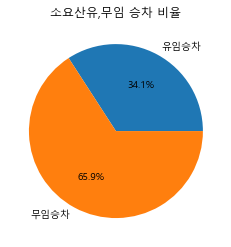

In [69]:
# 실습: 유임 승차 비율이 50% 이하인 역
import csv
import matplotlib.pyplot as plt
import platform

f=open('subwayfee.csv', encoding='euc_kr')
data=csv.reader(f)
header=next(data)
print(header)
min_rate=100
rate=0
min_row=[]
total_count=0
min_total_count=0

for row in data:
    for i in [4,6]:
        row[i]=int(row[i])
    total_count=row[4]+row[6]
    if (row[6] != 0) and (total_count >= 10000):  # 무임승차 인원이 없고, 총 승차인원이 1만명 이상
        rate = row[4] / total_count
        if rate <= 0.5:
            print(row, round(rate, 2))
            if rate < min_rate: # 유임 승차 비율이 가장 낮은 역 찾기
                min_rate = rate
                min_row = row
                min_total_count = total_count
print('유임 승차 비율이 가장 낮은 역: {0}, 전체 인원:{1:,}, 유임승차인원:{2:,}, 유임승차비율:{3:,}'.format(min_row[3], min_total_count, min_row[4], round(min_rate, 2)))
    
f.close()
if(platform.system() == 'Windows'):
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')
    
plt.title(min_row[3] + "유,무임 승차 비율")
label = ['유임승차', '무임승차']
values= [min_row[4], min_row[6]]

plt.pie(values, labels=label, autopct='%.1f%%')
plt.show()

In [73]:
# 전체 지하철 역 파이차트 분석
import csv
import matplotlib.pyplot as plt
import platform

label=['유임승차','유임하차','무임승차','무임하자']
c=['blue','red','green','yellow']  # 파이차트 컬러 값
pic_count=0
with open('subwayfee.csv', encoding='euc_kr') as f:
    data=csv.reader(f)
    next(data)
    if(platform.system() == 'Windows'):
        plt.rc('font', family='Malgun Gothic')
    else:
        plt.rc('font', family='Apple Gothic')
        
    for row in data:
        for i in range(4,8):
            row[i]=int(row[i])
            
        plt.figure(dpi=100)  # 저장할 그림파일의 dpi 설정
        plt.title(row[3]+' '+row[1])
        plt.pie(row[4:8], labels=label, colors=c, autopct='%.1f%%')    # 4개 항목에 대한 파이 차트 작성
        plt.savefig(row[3]+ ' '+row[1]+'.png')  # 지하철역 이름 + 호선 번호.png
        plt.close()  # 파일 닫기
        
        pic_count += 1
        if pic_count >= 10:    # 10개 역의 파이차트만 저장함
            break